### Student Information
Name: 陸柏宏

Student ID: 109164501

GitHub ID: LeafLu0315

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import math
%matplotlib inline

# First part:
## Take home exercises

In [ ]:
# Exercise 2
# Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information. 
X.iloc[::10, 0:][0:]

In [ ]:
# Exercise 5
'''
There is an old saying that goes, "The devil is in the details." 
When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). 
And also, we don't even know what kind of missing values we are facing. 
Thus, "debugging" skills get sharper as we spend more time solving bugs. 
Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. 
It's not easy to check for missing values as you will find out in a minute.
Please check the data and the process below, describe what you observe and why it happened.
'''
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

##### # Exercise 6
Q: Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

A: X_sample collects random data in X, so the ordering will different from the origin dataset X.

In [ ]:
# Exercise 8
'''
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.
Below we show you an snapshot of the type of chart we are looking for. 
'''
two_dist = pd.concat([X.category_name.value_counts(),X_sample.category_name.value_counts()],axis=1)
two_dist.plot(kind = 'bar', title = 'Category distribution', ylim = [0,650],rot = 0, fontsize = 12, figsize = (8,5))

In [ ]:
# Exercise 9
# Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!
analyze(' '.join(list(X[:1].text)))

In [ ]:
# Exercise 10
'''
We said that the 1 at the beginning of the fifth record represents the 00 term.
Notice that there is another 1 in the same record. 
Can you provide code that can verify what word this 1 represents from the vocabulary. 
Try to do this as efficient as possible.
'''
# Here 4 stands for '1', get_feature_names() will help us to collect the feature name
combine_arr = list(zip(X_counts[4,0:].toarray()[0],count_vect.get_feature_names()[0:]))
# Push the word into new_arr where the first word is '1'
new_arr = []
for i in range(len(combine_arr)):
    if(combine_arr[i][0] == 1):
        new_arr.append(combine_arr[i][1])
print(new_arr)

In [ ]:
# Exercise 11
'''
From the chart above, we can see how sparse the term-document matrix is; 
i.e., there is only one terms with frequency of 1 in the subselection of the matrix. 
By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. 
As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. 
How would you do this efficiently? 
Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization
'''
# we can randomly selcet 20 article and 20 terms to plot.
term_arr = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
size = 20
def getRndArr(arr_size,size):
    rand_index = []
    for i in range(size):
        rand = np.random.randint(0,arr_size)
        if rand not in rand_index:
            rand_index.append(rand)
    return rand_index

rand_index = getRndArr(len(count_vect.get_feature_names()),size)
rand_index2 = getRndArr(len(list(X.index)),size)
plot_x = ["term_"+str(i) for i in rand_index[0:20]]
plot_y = ["doc_"+ str(i) for i in rand_index2[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [ ]:
# Exercise 12
'''
Please try to reduce the dimension to 3, and plot the result use 3-D plot. 
Use at least 3 different angle (camera position) to check your result and describe what you found.
'''
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
x,y,z = X_reduced[:,0],X_reduced[:,1],X_reduced[:,2]
#print("x = ",x,"y= ",y,"z=",z)
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d') # 111的意思是把畫布分為1行1列，畫在第一個方格內。其實就是整個畫布。
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
# Even doing reduction, there are always having outliers even in 3-dimensional, and still, there is much more data with in one place

In [ ]:
# Exercise 13
# If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.
# 匯入plotly套件，以便繪製視覺化圖形
import plotly.graph_objs as go
df = pd.DataFrame({'x': count_vect.get_feature_names()[:300],'y': term_frequencies[:300]})
#df['x']
fig = go.Figure([go.Bar(x=df['x'], y=df['y'])])
fig.layout.xaxis.type = 'category'
fig.show()

In [ ]:
# Exercise 14
'''
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. 
Can you efficiently reduce the number of terms you want to visualize as an exercise. 
'''
# take 100 for example
import plotly.graph_objs as go
sample = 100
fig = go.Figure([go.Bar(x=count_vect.get_feature_names()[:sample], y=term_frequencies[:sample])])
fig.layout.xaxis.type = 'category'
fig.show()

In [ ]:
# Exercise 15
'''
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. 
This way the visualization is more meaninfgul and you will be able to observe the so called long tail 
(get familiar with this term since it will appear a lot in data mining and other statistics courses). 
see picture below
'''
import plotly.graph_objs as go
df = pd.DataFrame({'x': count_vect.get_feature_names()[:300],'y': term_frequencies[:300]})
# sort in frequency
df = df.sort_values(by=['y'], ascending=False, na_position='first')
fig = go.Figure([go.Bar(x=df['x'],y=df['y'])])
fig.layout.xaxis.type = 'category'
fig.show()

In [ ]:
# Exercise 16
# Try to generate the binarization using the category_name column instead. Does it work?
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# yes, it works

# Second part :
## New dataset

In [3]:
'''
1. Data Source
2. Data Preparation
3. Data Transformation
    3.1 Converting Dictionary into Pandas dataframe
    3.2 Familiarizing yourself with the Data
'''
# 1. Data Source
# 2. Data Preparation
# 3. Data Transformation
'''
path = "sentiment labelled sentences/"
amazon_cells_labelled = "amazon_cells_labelled.txt"
imdb_labelled = "imdb_labelled.txt"
yelp_labelled = "yelp_labelled.txt"
'''
filepath_dict = {'amazon': 'sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb':   'sentiment labelled sentences/imdb_labelled.txt',
                 'yelp':   'sentiment labelled sentences/yelp_labelled.txt', }
df_list = []

for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'score'], sep='\t')
    df['source'] = source
    df_list.append(df)
    
# Concat all in one dataframe
df = pd.concat(df_list)
# Here to split every dataframes
df_amazon = df[df['source'] == 'amazon']
df_imdb = df[df['source'] == 'imdb']
df_yelp = df[df['source'] == 'yelp']

df

sentence  score  source
0    So there is no way for me to plug it in here i...      0  amazon
1                          Good case, Excellent value.      1  amazon
2                               Great for the jawbone.      1  amazon
3    Tied to charger for conversations lasting more...      0  amazon
4                                    The mic is great.      1  amazon
..                                                 ...    ...     ...
995  I think food should have flavor and texture an...      0    yelp
996                           Appetite instantly gone.      0    yelp
997  Overall I was not impressed and would not go b...      0    yelp
998  The whole experience was underwhelming, and I ...      0    yelp
999  Then, as if I hadn't wasted enough of my life ...      0    yelp

[2748 rows x 3 columns]

In [4]:
'''
4. Data Mining using Pandas
    4.1 Dealing with Missing Values
    4.2 Dealing with Duplicate Data
'''
# 4. Data Mining using Pandas
df.isnull().apply(lambda x: dmh.check_missing_values(x))
df.drop_duplicates(keep=False, inplace=True)

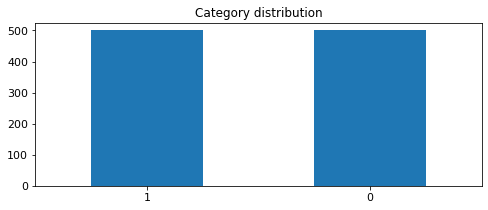

In [5]:
'''
5. Data Preprocessing
    5.1 Sampling
    5.2 Feature Creation
    5.3 Feature Subset Selection
    5.4 Dimensionality Reduction
    5.5 Atrribute Transformation / Aggregation
    5.6 Discretization and Binarization
'''
# 5.1 Sampling
df_sample = df.sample(n=1000)
df_amazon.score.value_counts().plot(kind = 'bar', title = 'Category distribution', rot = 0, fontsize = 11, figsize = (8,3))

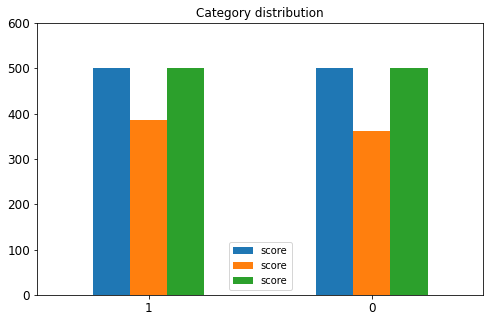

In [6]:
# 5.2 Feature Creation
three_dist = pd.concat([df_amazon.score.value_counts(),df_imdb.score.value_counts(),df_yelp.score.value_counts()],axis=1)
three_dist.plot(kind = 'bar', title = 'Category distribution', ylim = [0,600],rot = 0, fontsize = 12, figsize = (8,5))

In [7]:
df['words'] = df.sentence.apply(lambda x: dmh.tokenize_text(x))
df['words']

0      [So, there, is, no, way, for, me, to, plug, it...
1                   [Good, case, ,, Excellent, value, .]
2                          [Great, for, the, jawbone, .]
3      [Tied, to, charger, for, conversations, lastin...
4                               [The, mic, is, great, .]
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: words, Length: 2714, dtype: object

In [8]:
# 5.3 Feature Subset Selection
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)
analyze = count_vect.build_analyzer()
analyze(' '.join(list(df[0:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [9]:
df_counts.shape

(2714, 5153)

In [10]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [11]:
# 5.4 Dimensionality Reduction
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced

array([[ 0.72253878,  1.1053362 ],
       [-1.02862925,  0.0279282 ],
       [-0.28912074, -0.00935474],
       ...,
       [-0.51567053, -0.57769641],
       [ 0.30817678, -0.75715687],
       [ 2.16875905,  0.35122557]])

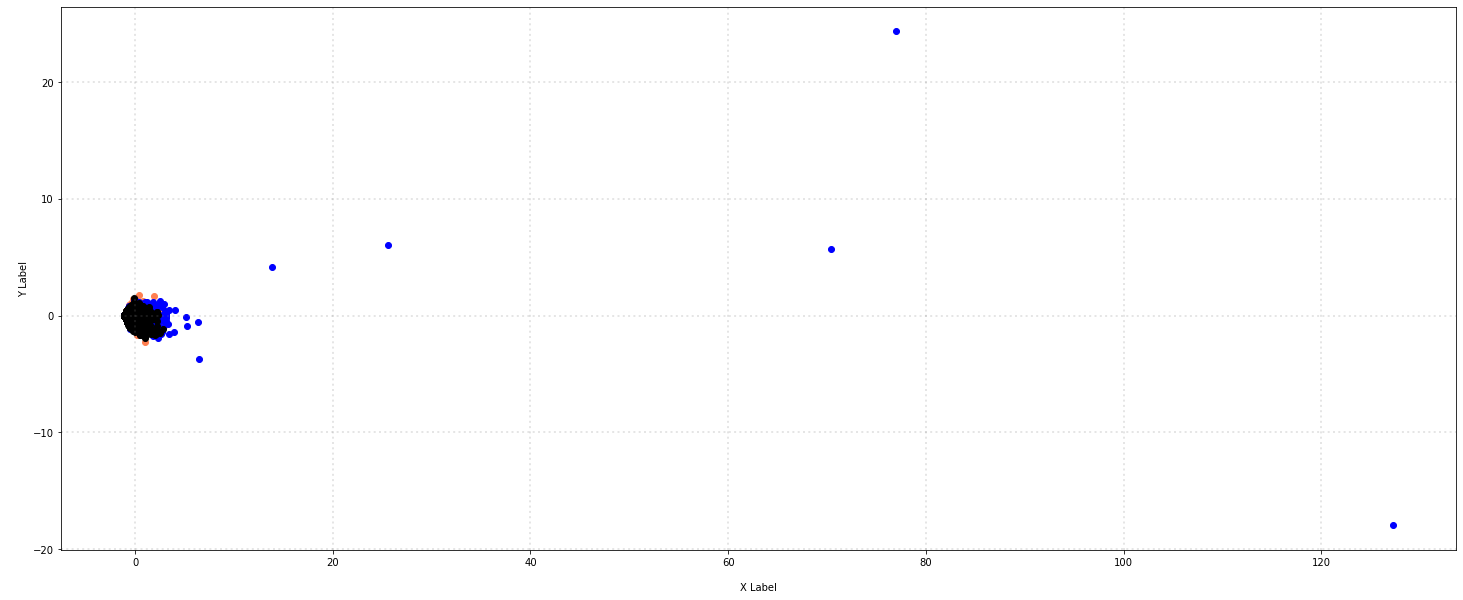

In [12]:
col = ['coral', 'blue', 'black']
categories=['amazon','imdb','yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['source'] == category].T[0]
    ys = df_reduced[df['source'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

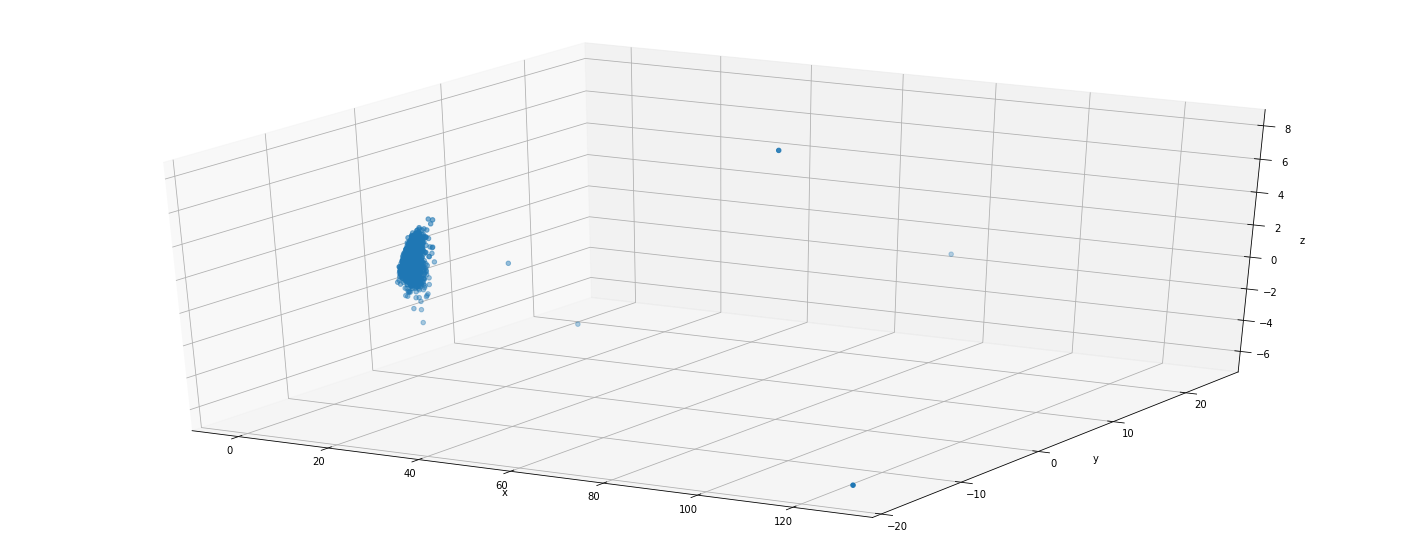

In [13]:
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
x,y,z = df_reduced[:,0],df_reduced[:,1],df_reduced[:,2]
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d') # 111的意思是把畫布分為1行1列，畫在第一個方格內。其實就是整個畫布。
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

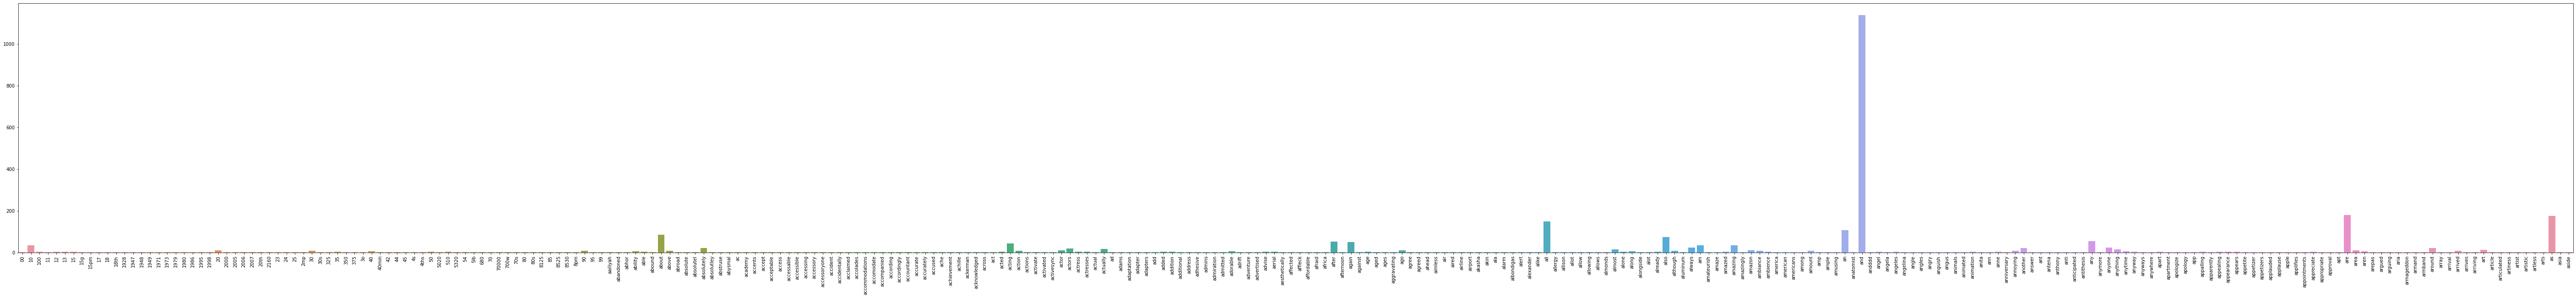

In [14]:
# 5.5 Atrribute Transformation / Aggregation
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [15]:
dff = pd.DataFrame({'x': count_vect.get_feature_names()[:300],'y': term_frequencies[:300]})
fig = go.Figure([go.Bar(x=dff['x'], y=dff['y'])])
fig.layout.xaxis.type = 'category'
fig.show()

In [16]:
sample = 100
fig = go.Figure([go.Bar(x=count_vect.get_feature_names()[:sample], y=term_frequencies[:sample])])
fig.layout.xaxis.type = 'category'
fig.show()

In [17]:
dff = pd.DataFrame({'x': count_vect.get_feature_names()[:300],'y': term_frequencies[:300]})
# sort in frequency
dff = dff.sort_values(by=['y'], ascending=False, na_position='first')
fig = go.Figure([go.Bar(x=dff['x'],y=dff['y'])])
fig.layout.xaxis.type = 'category'
fig.show()

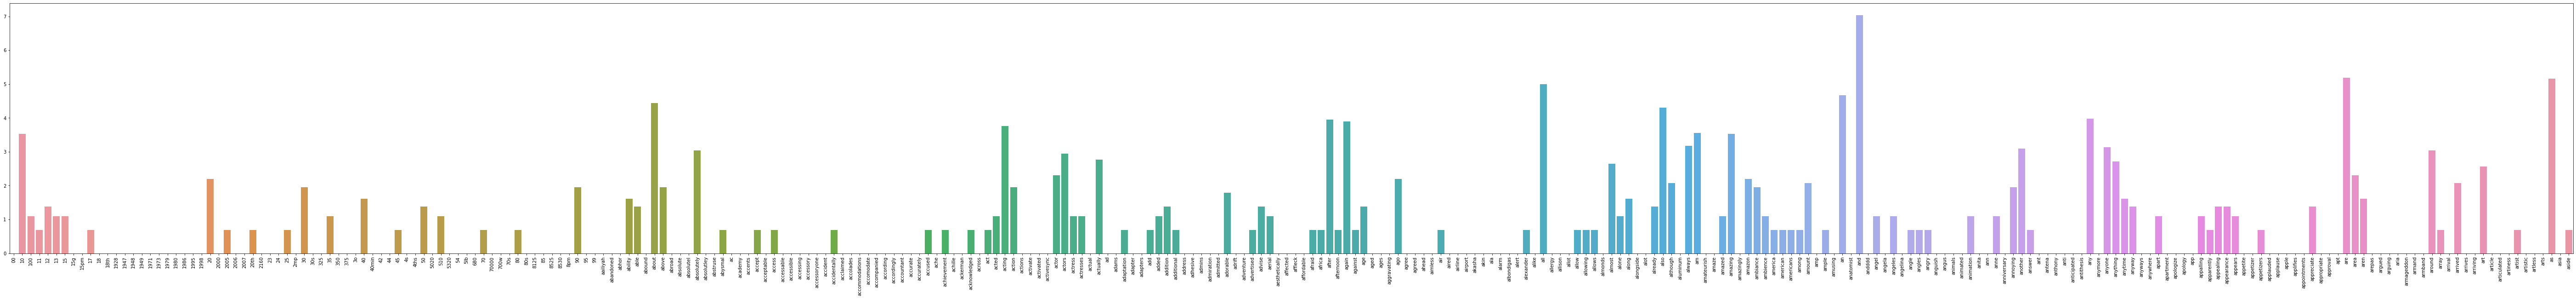

In [18]:
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [19]:
# 5.6 Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.source)
mlb.classes_
df['bin_source'] = mlb.transform(df['source']).tolist()
df

sentence  score  source  \
0    So there is no way for me to plug it in here i...      0  amazon   
1                          Good case, Excellent value.      1  amazon   
2                               Great for the jawbone.      1  amazon   
3    Tied to charger for conversations lasting more...      0  amazon   
4                                    The mic is great.      1  amazon   
..                                                 ...    ...     ...   
995  I think food should have flavor and texture an...      0    yelp   
996                           Appetite instantly gone.      0    yelp   
997  Overall I was not impressed and would not go b...      0    yelp   
998  The whole experience was underwhelming, and I ...      0    yelp   
999  Then, as if I hadn't wasted enough of my life ...      0    yelp   

                                                 words bin_source  
0    [So, there, is, no, way, for, me, to, plug, it...  [1, 0, 0]  
1                 [Good, case, ,, Excellent, value, .]  [1, 0, 0]  
2                        [Great, for, the, jawbone, .]  [1, 0, 0]  
3    [Tied, to, charger, for, conversations, lastin...  [1, 0, 0]  
4                             [The, mic, is, great, .]  [1, 0, 0]  
..                                                 ...        ...  
995  [I, think, food, should, have, flavor, and, te...  [0, 0, 1]  
996                     [Appetite, instantly, gone, .]  [0, 0, 1]  
997  [Overall, I, was, not, impressed, and, would, ...  [0, 0, 1]  
998  [The, whole, experience, was, underwhelming, ,...  [0, 0, 1]  
999  [Then, ,, as, if, I, had, n't, wasted, enough,...  [0, 0, 1]  

[2714 rows x 5 columns]

In [20]:
# 6. Data Exploration
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [21]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [22]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third part
- Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
- Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed   differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
- Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.


In [24]:
# Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
# we can first remove the stop words to analyze the data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
stop_words = stopwords.words('english')

df_new_list = []

# Create new DataFrame
for source, filepath in filepath_dict.items():
    df_new = pd.read_csv(filepath, names=['sentence', 'score'], sep='\t')
    df_new['sentence'] = df_new.sentence.apply(lambda x: x.lower())
    df_new['sentence'] = df_new['sentence'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
    df_new['sentence'] = df_new.sentence.str.replace("[^\w\s]", "")
    df_new['source'] = source
    df_new_list.append(df)
    
# Concat all in one dataframe
df_new = pd.concat(df_list)
df_new

sentence  score  source
0    So there is no way for me to plug it in here i...      0  amazon
1                          Good case, Excellent value.      1  amazon
2                               Great for the jawbone.      1  amazon
3    Tied to charger for conversations lasting more...      0  amazon
4                                    The mic is great.      1  amazon
..                                                 ...    ...     ...
995  I think food should have flavor and texture an...      0    yelp
996                           Appetite instantly gone.      0    yelp
997  Overall I was not impressed and would not go b...      0    yelp
998  The whole experience was underwhelming, and I ...      0    yelp
999  Then, as if I hadn't wasted enough of my life ...      0    yelp

[2748 rows x 3 columns]

In [27]:
count_vect = CountVectorizer()
df_new_counts = count_vect.fit_transform(df_new.sentence)
analyze = count_vect.build_analyzer()
analyze(' '.join(list(df_new[0:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [29]:
words = []
for item in df_new[:].sentence[:].str.split(' '):
    for word in item:
        if word not in words:
            words.append(word)

from collections import Counter
c = Counter(words)
c

Counter({'So': 1,
         'there': 1,
         'is': 1,
         'no': 1,
         'way': 1,
         'for': 1,
         'me': 1,
         'to': 1,
         'plug': 1,
         'it': 1,
         'in': 1,
         'here': 1,
         'the': 1,
         'US': 1,
         'unless': 1,
         'I': 1,
         'go': 1,
         'by': 1,
         'a': 1,
         'converter.': 1,
         'Good': 1,
         'case,': 1,
         'Excellent': 1,
         'value.': 1,
         'Great': 1,
         'jawbone.': 1,
         'Tied': 1,
         'charger': 1,
         'conversations': 1,
         'lasting': 1,
         'more': 1,
         'than': 1,
         '45': 1,
         'minutes.MAJOR': 1,
         'PROBLEMS!!': 1,
         'The': 1,
         'mic': 1,
         'great.': 1,
         'have': 1,
         'jiggle': 1,
         'get': 1,
         'line': 1,
         'up': 1,
         'right': 1,
         'decent': 1,
         'volume.': 1,
         'If': 1,
         'you': 1,
         'several

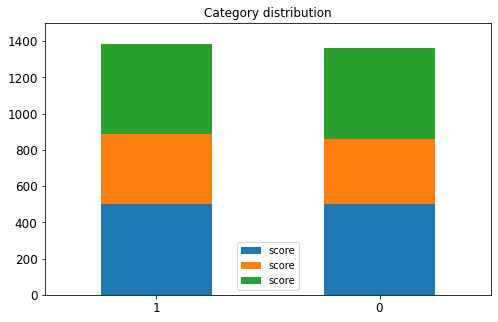

In [44]:
three_dist = pd.concat([df_amazon.score.value_counts(),df_imdb.score.value_counts(),df_yelp.score.value_counts()],axis=1)
three_dist.plot(kind = 'bar', title = 'Category distribution', ylim = [0,1500],rot = 0, fontsize = 12, figsize = (8,5),stacked = True)

In [46]:
df

sentence  score  source  \
0    So there is no way for me to plug it in here i...      0  amazon   
1                          Good case, Excellent value.      1  amazon   
2                               Great for the jawbone.      1  amazon   
3    Tied to charger for conversations lasting more...      0  amazon   
4                                    The mic is great.      1  amazon   
..                                                 ...    ...     ...   
995  I think food should have flavor and texture an...      0    yelp   
996                           Appetite instantly gone.      0    yelp   
997  Overall I was not impressed and would not go b...      0    yelp   
998  The whole experience was underwhelming, and I ...      0    yelp   
999  Then, as if I hadn't wasted enough of my life ...      0    yelp   

                                                 words bin_source  
0    [So, there, is, no, way, for, me, to, plug, it...  [1, 0, 0]  
1                 [Good, case, ,, Excellent, value, .]  [1, 0, 0]  
2                        [Great, for, the, jawbone, .]  [1, 0, 0]  
3    [Tied, to, charger, for, conversations, lastin...  [1, 0, 0]  
4                             [The, mic, is, great, .]  [1, 0, 0]  
..                                                 ...        ...  
995  [I, think, food, should, have, flavor, and, te...  [0, 0, 1]  
996                     [Appetite, instantly, gone, .]  [0, 0, 1]  
997  [Overall, I, was, not, impressed, and, would, ...  [0, 0, 1]  
998  [The, whole, experience, was, underwhelming, ,...  [0, 0, 1]  
999  [Then, ,, as, if, I, had, n't, wasted, enough,...  [0, 0, 1]  

[2714 rows x 5 columns]

In [51]:
# Generate TF-IDF features from the tokens of each text.
# This will generating a document matrix, however, the weights will be computed differently.
# (using the TF-IDF value of each word per document as opposed to the word frequency)
# Refer to this Sciki-learn guide .
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df.sentence.to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [53]:
df_tfidf = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_tfidf

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2709  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2710  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2711  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2712  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2713  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2709  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2710  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2711  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2712  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2713  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2714 rows x 5153 columns]

In [57]:
# Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.
# Use both the TF-IDF features and word frequency features to build two seperate classifiers.
# Comment on the differences. Refer to this article.


# Fourth part
## In the lab, we applied each step really quickly just to illustrate how to work with your dataset. 
## There are somethings that are not ideal or the most efficient/meaningful. 
## Each dataset can be handled differently as well. 
## What are those inefficent parts you noticed?
## How can you improve the Data preprocessing for these specific datasets? 

    The inefficient part might be the term-doc graph, terms are almost less related to the docs.

    I think we can use in statistic way to improve the visualization, such as using the frequency to make the matrix.
    The higher frequency term, the fronter it'll be, and remake the term-doc matrices.